In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

(df.shape)

(96845, 8)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [3]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [4]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
print(df.isnull().sum())

year                 0
month_name           0
date                 0
state                0
vehicle_class        0
vehicle_category     0
vehicle_type         0
ev_sales_quantity    0
dtype: int64


In [7]:
yearly_sales = df.groupby("year")['ev_sales_quantity'].sum().reset_index()

In [8]:
state_sales = df.groupby("state")['ev_sales_quantity'].sum().reset_index().sort_values(by="ev_sales_quantity", ascending=False).head(10)

In [9]:
vehicle_sales = df.groupby("vehicle_type")['ev_sales_quantity'].sum().reset_index()

/tmp/ipython-input-2468072320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='year', y='ev_sales_quantity', palette='coolwarm')


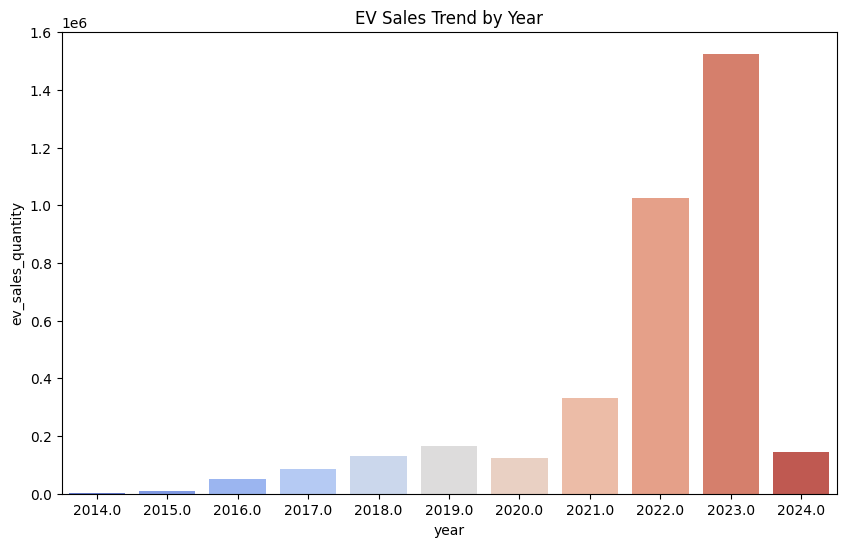

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_sales, x='year', y='ev_sales_quantity', palette='coolwarm')
plt.title("EV Sales Trend by Year")
plt.show()

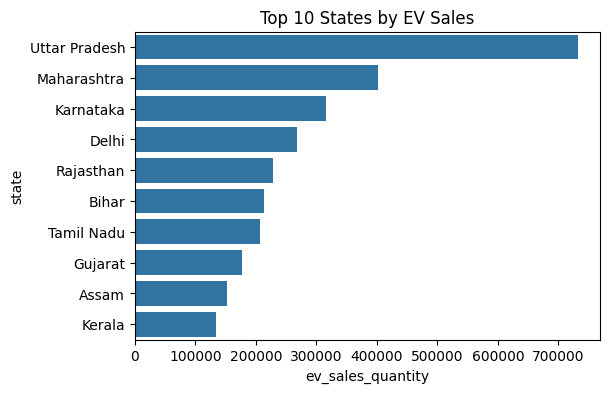

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(data=state_sales, x='ev_sales_quantity', y='state')
plt.title("Top 10 States by EV Sales")
plt.show()

/tmp/ipython-input-1833343165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_sales, x='ev_sales_quantity', y='vehicle_type', palette='coolwarm')


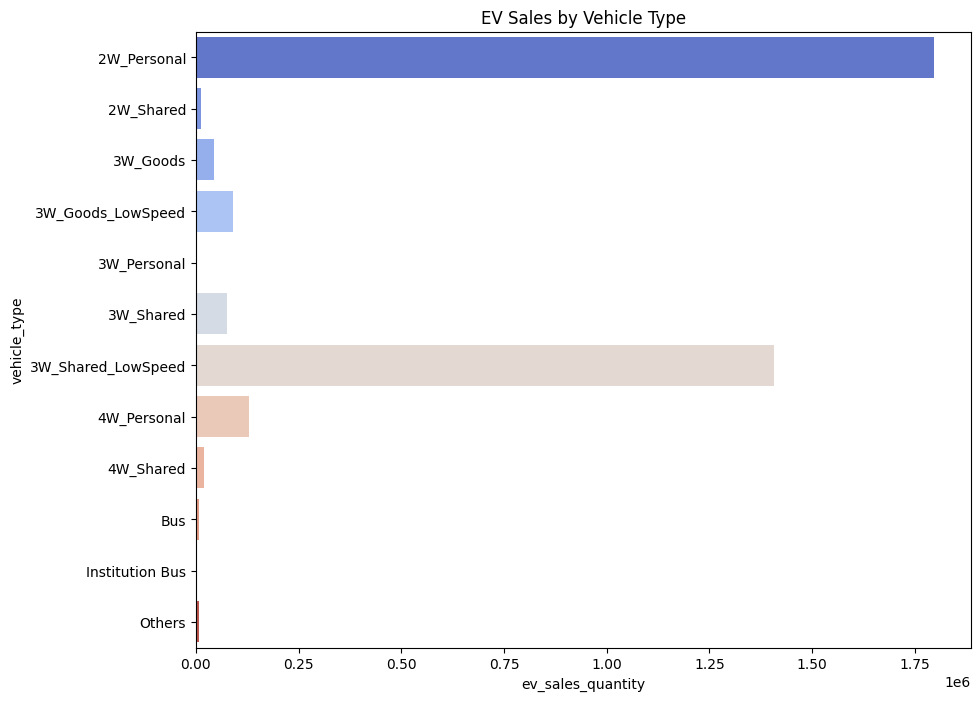

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data=vehicle_sales, x='ev_sales_quantity', y='vehicle_type', palette='coolwarm')
plt.title("EV Sales by Vehicle Type")
plt.show()

In [13]:
df.to_csv("cleaned_ev_sales.csv", index=False)

                       year  ev_sales_quantity
year               1.000000           0.095326
ev_sales_quantity  0.095326           1.000000


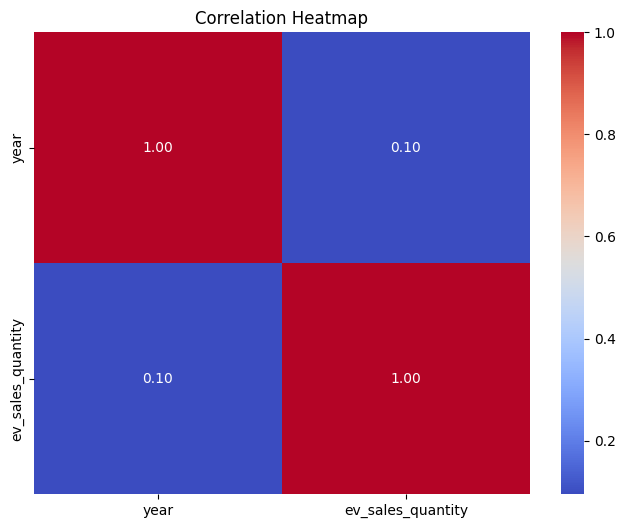

In [14]:
import numpy as np

corr = df.corr(numeric_only=True)
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
from scipy.stats import skew, kurtosis

sales_data = df['ev_sales_quantity'].dropna()

print("Skewness of EV Sales:", skew(sales_data))
print("Kurtosis of EV Sales:", kurtosis(sales_data))


Skewness of EV Sales: 24.58490374514613
Kurtosis of EV Sales: 788.7626560988282


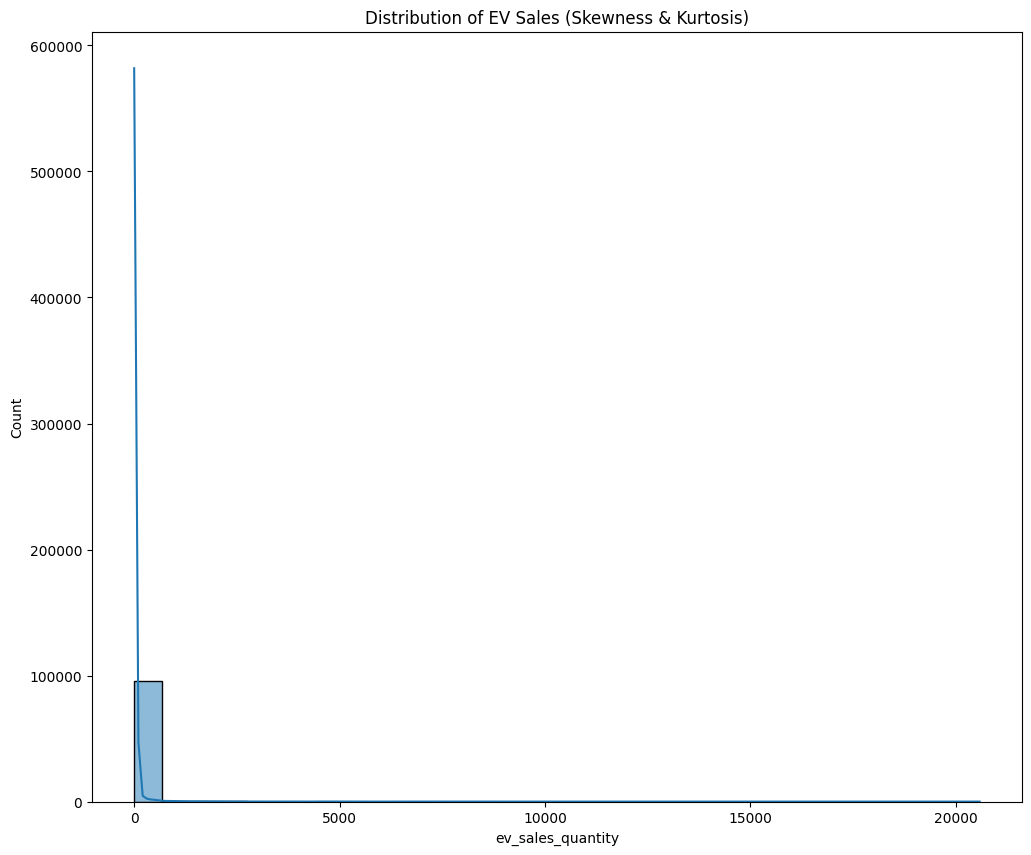

In [16]:
plt.figure(figsize=(12,10))
sns.histplot(sales_data, bins=30, kde=True)
plt.title("Distribution of EV Sales (Skewness & Kurtosis)")
plt.show()
